## Example for plotting TESS target pixel file & surrounding objects

In [1]:
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from bsg.bsg_utils import plot_TESS_stars

/lhome/colej/software/miniconda3/envs/bsg/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /lhome/colej/.lightkurve/cache. Please move all the files in the legacy directory /lhome/colej/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


First, we want to define the target and designate the appropriate path for saving plots

In [2]:
tic = 'TIC 276936458'
indir = './plots/'

Next, we want to search for the target using lightkurve

We want to issue two searches. 
The first is to obtain the extracted lightcurve and the second is to download the targetpixelfile (tpf) of the first available sector of data. This is required for plotting below.

In [3]:
lc = lk.search_lightcurve(tic, author='SPOC').download_all().stitch().remove_nans().remove_outliers().normalize()
tpf = lk.search_targetpixelfile(tic, author='SPOC')[0].download()

/lhome/colej/astro/astero/BSGs/bsg_seismology/bsg/bsg_utils.py:180: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  sector = tpf.header['SECTOR']
/lhome/colej/astro/astero/BSGs/bsg_seismology/bsg/bsg_utils.py:235: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad = 5)


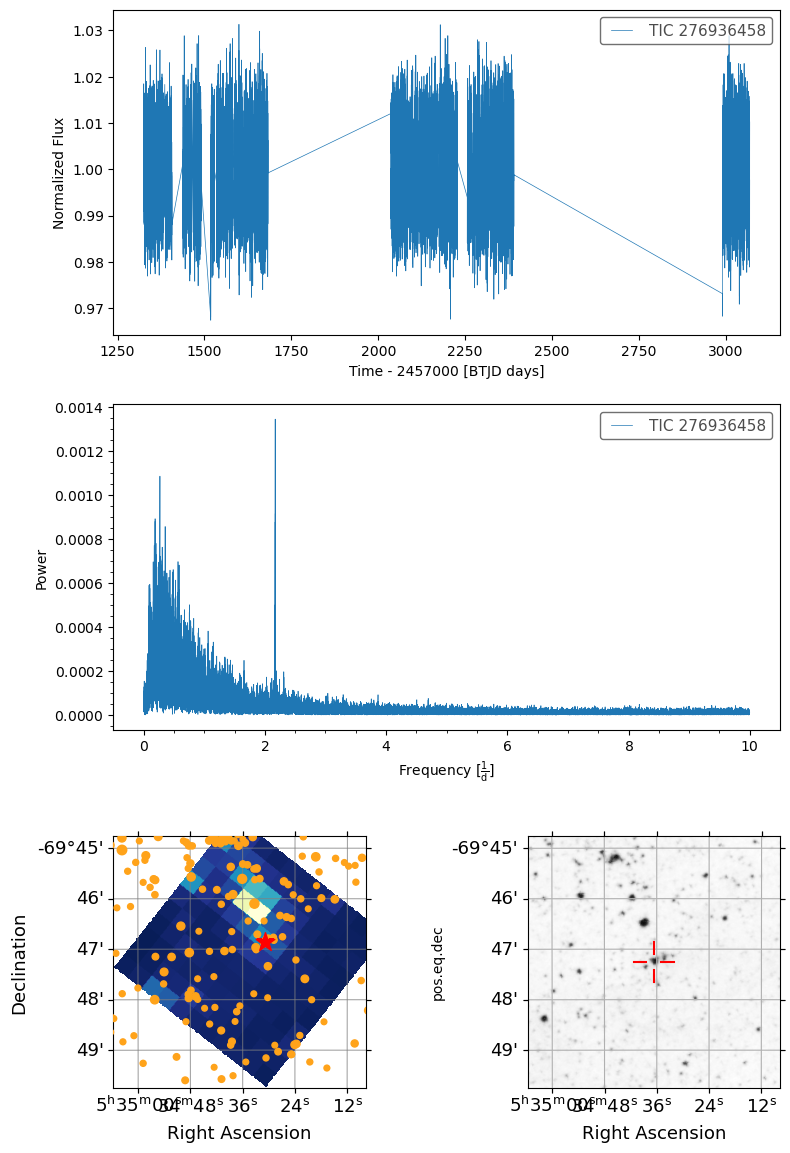

In [4]:
fig = plt.figure(layout="constrained", figsize=(8,12))
gs = GridSpec(3,2,figure=fig)

ax_lc = fig.add_subplot(gs[0,:])
ax_ls = fig.add_subplot(gs[1,:])

lc.plot(ax=ax_lc)
ls = lc.to_periodogram(maximum_frequency=10.)
ls.plot(ax=ax_ls)

fig, Tmag, teff, radius, mass, vmag, logg, plx, c_id = plot_TESS_stars(tic, indir, tpf, fig, 
                                                                       gs[2,0], gs[2,1], 
                                                                       show=False, save=True)

plt.show()